In [5]:
import requests


In [6]:
import pandas as pd

In [7]:
def get_nasa_power_data(lat, lon, start_date, end_date):
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "T2M,PRECTOTCORR,RH2M,PS",
        "community": "RE",
        "latitude": lat,
        "longitude": lon,
        "start": start_date,
        "end": end_date,
        "format": "JSON"
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Parse data into DataFrame
    df = pd.DataFrame(data['properties']['parameter'])
    df['date'] = pd.to_datetime(df.index)
    return df

In [8]:
lat, lon = 25, 79.5
start_date, end_date = "20230101", "20231231"
data = get_nasa_power_data(lat, lon, start_date, end_date)
print(data)


            T2M  PRECTOTCORR   RH2M     PS       date
20230101  13.42          0.0  68.94  99.04 2023-01-01
20230102  11.80          0.0  70.62  99.11 2023-01-02
20230103  11.01          0.0  71.31  99.12 2023-01-03
20230104  10.05          0.0  66.38  99.16 2023-01-04
20230105   9.28          0.0  67.19  99.29 2023-01-05
...         ...          ...    ...    ...        ...
20231227  16.07          0.0  63.19  98.98 2023-12-27
20231228  15.50          0.0  61.50  98.85 2023-12-28
20231229  15.05          0.0  60.44  98.88 2023-12-29
20231230  15.37          0.0  60.69  98.79 2023-12-30
20231231  15.61          0.0  63.50  98.74 2023-12-31

[365 rows x 5 columns]


In [9]:
import requests
import pandas as pd

def get_nasa_power_data(lat, lon, start_date, end_date):
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point"
    params = {
        "parameters": "T2M,PRECTOTCORR,RH2M,PS",
        "community": "RE",
        "latitude": lat,
        "longitude": lon,
        "start": start_date,
        "end": end_date,
        "format": "JSON"
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Parse data into DataFrame
    df = pd.DataFrame(data['properties']['parameter'])
    df['date'] = pd.to_datetime(df.index)
    return df

# Example usage
lat, lon = 25, 79.5
start_date, end_date = "20230101", "20231231"
data = get_nasa_power_data(lat, lon, start_date, end_date)

# Save the data as CSV
data.to_csv("nasa_power_data.csv", index=False)
print("Data saved to nasa_power_data.csv")


Data saved to nasa_power_data.csv


In [10]:
lat, lon = 21, 79.0
start_date, end_date = "20230101", "20231231"
data = get_nasa_power_data(lat, lon, start_date, end_date)

In [11]:
data.to_csv("Lat21Lon79.csv", index=False)
print("Data saved to nasa_power_data.csv")

Data saved to nasa_power_data.csv


In [12]:
lat, lon = 11.5, 76.0
start_date, end_date = "20230101", "20231231"
data = get_nasa_power_data(lat, lon, start_date, end_date)

In [13]:
data.to_csv("Lat115Lon76.csv", index=False)
print("Data saved to nasa_power_data.csv")

Data saved to nasa_power_data.csv


Linear Regression


In [14]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Logistic Regression

In [15]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_pred = self.sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        # Convert probabilities to binary output (0 or 1)
        y_pred_proba = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in y_pred_proba]



In [16]:
import numpy as np

class LassoRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, alpha=1.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for j in range(n_features):
                # Predict with current weights
                y_pred = X @ self.weights + self.bias

                # Calculate partial derivative with respect to w_j
                residual = y - y_pred + X[:, j] * self.weights[j]
                rho = X[:, j].T @ residual

                # Update w_j according to soft thresholding
                if rho < -self.alpha / 2:
                    self.weights[j] = (rho + self.alpha / 2) / np.sum(X[:, j]**2)
                elif rho > self.alpha / 2:
                    self.weights[j] = (rho - self.alpha / 2) / np.sum(X[:, j]**2)
                else:
                    self.weights[j] = 0

            # Update bias term
            self.bias = np.mean(y - X @ self.weights)

    def predict(self, X):
        return X @ self.weights + self.bias



In [17]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        # Stopping conditions
        n_samples, n_features = X.shape
        if depth >= self.max_depth or n_samples < self.min_samples_split:
            return np.mean(y)

        # Randomly select features
        feat_idxs = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)
        best_feat, best_thresh = self._best_split(X, y, feat_idxs)
        if best_feat is None:
            return np.mean(y)

        # Split data
        left_idxs = X[:, best_feat] < best_thresh
        right_idxs = X[:, best_feat] >= best_thresh
        left_subtree = self.fit(X[left_idxs], y[left_idxs], depth + 1)
        right_subtree = self.fit(X[right_idxs], y[right_idxs], depth + 1)
        return {'feature': best_feat, 'threshold': best_thresh, 'left': left_subtree, 'right': right_subtree}

    def _best_split(self, X, y, feat_idxs):
        best_feat, best_thresh, best_mse = None, None, float("inf")
        for feat in feat_idxs:
            thresholds = np.unique(X[:, feat])
            for thresh in thresholds:
                left_idxs, right_idxs = X[:, feat] < thresh, X[:, feat] >= thresh
                left_mse = np.mean((y[left_idxs] - y[left_idxs].mean()) ** 2) if len(y[left_idxs]) > 0 else 0
                right_mse = np.mean((y[right_idxs] - y[right_idxs].mean()) ** 2) if len(y[right_idxs]) > 0 else 0
                mse = left_mse * len(left_idxs) + right_mse * len(right_idxs)
                if mse < best_mse:
                    best_feat, best_thresh, best_mse = feat, thresh, mse
        return best_feat, best_thresh

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _predict_sample(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        feature, threshold = tree['feature'], tree['threshold']
        if x[feature] < threshold:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            # Bootstrap sample
            idxs = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[idxs], y[idxs]
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.tree = tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)




In [18]:
data = pd.read_csv("nasa_power_data.csv")


In [19]:
data2 = pd.read_csv("Lat21Lon79.csv")

In [20]:
data3 = pd.read_csv("Lat115Lon76.csv")

In [21]:
print(data.head())

     T2M  PRECTOTCORR   RH2M     PS        date
0  13.42          0.0  68.94  99.04  2023-01-01
1  11.80          0.0  70.62  99.11  2023-01-02
2  11.01          0.0  71.31  99.12  2023-01-03
3  10.05          0.0  66.38  99.16  2023-01-04
4   9.28          0.0  67.19  99.29  2023-01-05


In [22]:
print(data2.head())

     T2M  PRECTOTCORR   RH2M     PS        date
0  18.44         0.00  64.62  97.83  2023-01-01
1  18.05         0.00  64.62  97.87  2023-01-02
2  18.10         0.01  68.81  97.84  2023-01-03
3  17.68         1.40  76.25  97.81  2023-01-04
4  17.18         0.05  79.94  98.01  2023-01-05


In [23]:
print(data3.head())

     T2M  PRECTOTCORR   RH2M     PS        date
0  20.83          0.0  69.12  93.98  2023-01-01
1  20.47          0.0  71.94  93.93  2023-01-02
2  20.53          0.0  75.00  93.96  2023-01-03
3  20.85          0.0  74.81  93.86  2023-01-04
4  20.76          0.0  73.00  93.88  2023-01-05


In [102]:
X = data3[['T2M', 'RH2M', 'PS']]
y = data3['PRECTOTCORR']

In [103]:
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X, y)
predictions = model.predict(X)

/tmp/ipykernel_947/579505397.py:26: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * dw
/tmp/ipykernel_947/579505397.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  self.bias -= self.learning_rate * db


In [104]:
predictions


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [105]:
lasso_model = LassoRegressionScratch(learning_rate=0.01, epochs=1000, alpha=0.1)
lasso_model.fit(X, y)
predictions = lasso_model.predict(X)


InvalidIndexError: (slice(None, None, None), 0)

In [106]:
rf_model = RandomForest(n_trees=10, max_depth=10, min_samples_split=2)
rf_model.fit(X, y)
predictions = rf_model.predict(X)

KeyError: "None of [Int64Index([ 95,  31, 300,  94,   6,  78, 333, 102, 281, 295,\n            ...\n            180, 170, 247, 195, 287, 334, 312,  19, 192, 167],\n           dtype='int64', length=365)] are in the [columns]"

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
models = {
    'Linear Regression': LinearRegression(),
    'LASSO': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

In [111]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

In [112]:
results_df = pd.DataFrame(results)
print(results_df)

     Linear Regression      LASSO  Random Forest
MAE           3.833051   3.791777       2.323891
MSE          30.215327  29.955703      19.333873
R2            0.165822   0.172990       0.466235


In [113]:
predictions


array([6.23352501e+00, 1.68772340e-01, 1.67477865e-03, 4.89873299e+00,
       1.21016521e-03, 7.80575021e+00, 1.12609952e+00, 8.00258964e+00,
       3.06196186e+00, 4.47906054e+00, 1.16888781e+01, 7.47786500e-05,
       2.17043570e+00, 1.81016521e-03, 1.42319396e+00, 7.81232869e-01,
       6.94023705e-03, 1.98828520e+00, 2.39407042e+00, 5.55574390e-02,
       1.21016521e-03, 4.00791553e+00, 2.12786071e-01, 5.93557326e+00,
       7.89151756e+00, 2.04482716e+00, 2.99006822e+00, 1.48120518e+00,
       1.22647160e+00, 2.58827004e-01, 3.31005673e-01, 2.16760000e+00,
       6.74778650e-04, 1.66436244e+00, 8.68306528e+00, 2.48052768e+00,
       1.32651368e-02, 3.37705673e-01, 1.26528722e+01, 7.86889600e-01,
       2.03235888e+00, 5.83494846e+00, 8.44081920e-01, 1.75604779e+00,
       2.34450000e+00, 2.36137965e+00, 1.35450594e+00, 8.10165212e-04,
       3.62732210e-02, 2.77723396e-02, 9.67312561e+00, 1.76685159e+00,
       9.61325417e+00, 8.53664689e+00, 1.96376106e+00, 4.27251991e+00,
      

In [148]:
temperature = data3['T2M']
relative_humidity = data3['RH2M'] 
pressure = data3['PS'] 
precipitation = data3['PRECTOTCORR']

In [149]:
datatb = pd.DataFrame({
    "Temperature": temperature,
    "Humidity": relative_humidity,
    "Pressure": pressure,
    "Original_Precipitation": precipitation
})

In [150]:
X = datatb[["Temperature", "Humidity", "Pressure"]]
y = datatb["Original_Precipitation"]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [158]:
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [159]:
data_test = X_test.copy()
data_test["Original_Precipitation"] = y_test
data_test["Linear_Regression_Pred"] = linear_model.predict(X_test)
data_test["Lasso_Pred"] = lasso_model.predict(X_test)
data_test["Random_Forest_Pred"] = rf_model.predict(X_test)

In [160]:
print(data_test.head())

     Temperature  Humidity  Pressure  Original_Precipitation  \
193        22.12     87.88     93.56                    3.60   
33         24.25     63.50     93.60                    0.62   
15         21.87     63.38     93.65                    0.00   
309        23.08     86.00     93.79                    5.10   
57         23.98     43.00     93.93                    0.00   

     Linear_Regression_Pred  Lasso_Pred  Random_Forest_Pred  
193                6.437681    5.928619              6.7159  
33                 1.884807    1.467556              0.1709  
15                 2.243729    1.324322              0.0008  
309                3.345146    4.661605              4.9767  
57                -4.335883   -3.390785              0.0013  


In [129]:
import matplotlib.pyplot as plt

In [130]:
data_test = data_test.sort_index()

In [131]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

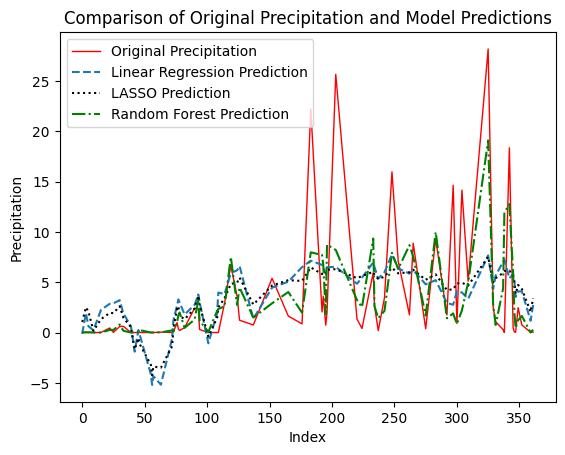

In [132]:
plt.plot(data_test.index, data_test["Original_Precipitation"], label="Original Precipitation", color="red", linewidth=1)
plt.plot(data_test.index, data_test["Linear_Regression_Pred"], label="Linear Regression Prediction", linestyle="--")
plt.plot(data_test.index, data_test["Lasso_Pred"], label="LASSO Prediction", color="black", linestyle=":")
plt.plot(data_test.index, data_test["Random_Forest_Pred"], label="Random Forest Prediction", color="green", linestyle="-.")
plt.xlabel("Index")
plt.ylabel("Precipitation")
plt.title("Comparison of Original Precipitation and Model Predictions")
plt.legend()
plt.show()


In [135]:
datatb['Temperature_Lag1'] = datatb['Temperature'].shift(1)
datatb['Humidity_Lag1'] = datatb['Humidity'].shift(1)
datatb['Pressure_Lag1'] = datatb['Pressure'].shift(1)
datatb['Precipitation_Lag1'] = datatb['Original_Precipitation'].shift(1)

In [136]:
datatb = datatb.dropna()

In [137]:
X = datatb[['Temperature_Lag1', 'Humidity_Lag1', 'Pressure_Lag1', 'Precipitation_Lag1']]
y = datatb['Original_Precipitation']

In [138]:
train_size = int(len(datatb) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [139]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [140]:
y_pred = rf_model.predict(X_test)

In [141]:
results = pd.DataFrame({
    "Original_Precipitation": y_test,
    "Random_Forest_Pred": y_pred
})
print(results.head())

     Original_Precipitation  Random_Forest_Pred
292                    1.74              3.4798
293                    1.06              3.5127
294                    0.54              4.9677
295                    0.63              1.5657
296                    0.73              1.7823


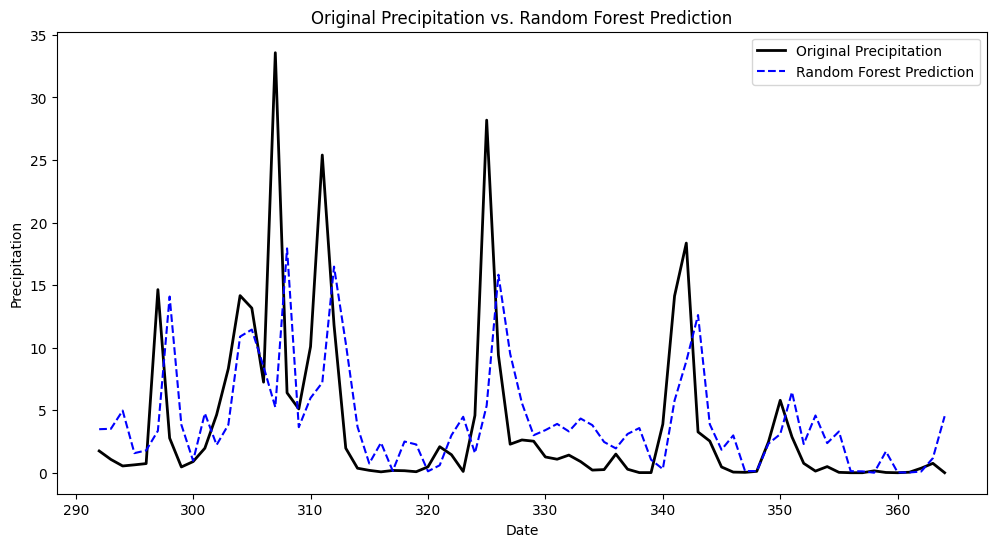

In [142]:
plt.figure(figsize=(12, 6))
plt.plot(results.index, results["Original_Precipitation"], label="Original Precipitation", color="black", linewidth=2)
plt.plot(results.index, results["Random_Forest_Pred"], label="Random Forest Prediction", linestyle="--", color="blue")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Original Precipitation vs. Random Forest Prediction")
plt.legend()
plt.show()

In [143]:
lat, lon = 25, 79.5
start_date, end_date = "20240101", "20240731"
datan1 = get_nasa_power_data(lat, lon, start_date, end_date)
print(datan1)

            T2M  PRECTOTCORR   RH2M     PS       date
20240101  15.69         0.00  70.38  98.75 2024-01-01
20240102  15.31         0.03  74.25  98.71 2024-01-02
20240103  16.50         1.26  78.81  98.60 2024-01-03
20240104  16.38         0.64  80.94  98.64 2024-01-04
20240105  14.10         1.20  91.06  98.75 2024-01-05
...         ...          ...    ...    ...        ...
20240727  32.12         0.76  68.56  96.75 2024-07-27
20240728  31.88         3.16  68.50  96.66 2024-07-28
20240729  31.88         0.93  68.50  96.69 2024-07-29
20240730  31.46         0.08  68.31  97.03 2024-07-30
20240731  29.26        26.31  82.81  97.17 2024-07-31

[213 rows x 5 columns]


In [164]:
temperature = datan1['T2M']
relative_humidity = datan1['RH2M'] 
pressure = datan1['PS'] 
precipitation = datan1['PRECTOTCORR']

In [165]:
datantb = pd.DataFrame({
    "Temperature": temperature,
    "Humidity": relative_humidity,
    "Pressure": pressure,
    "Original_Precipitation": precipitation
})

In [166]:
X = datantb[["Temperature", "Humidity", "Pressure"]]
y = datantb["Original_Precipitation"]

In [167]:
data_test = X.copy()
data_test["Original_Precipitation"] = y
data_test["Linear_Regression_Pred"] = linear_model.predict(X)
data_test["Lasso_Pred"] = lasso_model.predict(X)
data_test["Random_Forest_Pred"] = rf_model.predict(X)

In [168]:
print(data_test.head())

          Temperature  Humidity  Pressure  Original_Precipitation  \
20240101        15.69     70.38     98.75                    0.00   
20240102        15.31     74.25     98.71                    0.03   
20240103        16.50     78.81     98.60                    1.26   
20240104        16.38     80.94     98.64                    0.64   
20240105        14.10     91.06     98.75                    1.20   

          Linear_Regression_Pred  Lasso_Pred  Random_Forest_Pred  
20240101              -49.199558  -17.441850              0.0458  
20240102              -48.099474  -16.599250              0.0079  
20240103              -46.755832  -15.409591              0.4330  
20240104              -46.850413  -15.194024              0.2798  
20240105              -45.785023  -13.798926              7.7830  


In [169]:
data_test = data_test.sort_index()

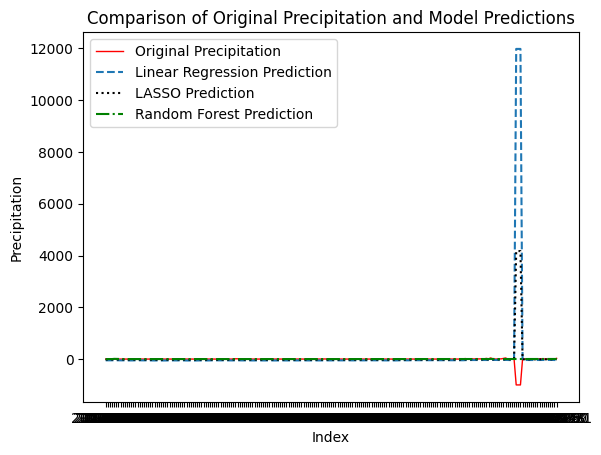

In [170]:
plt.plot(data_test.index, data_test["Original_Precipitation"], label="Original Precipitation", color="red", linewidth=1)
plt.plot(data_test.index, data_test["Linear_Regression_Pred"], label="Linear Regression Prediction", linestyle="--")
plt.plot(data_test.index, data_test["Lasso_Pred"], label="LASSO Prediction", color="black", linestyle=":")
plt.plot(data_test.index, data_test["Random_Forest_Pred"], label="Random Forest Prediction", color="green", linestyle="-.")
plt.xlabel("Index")
plt.ylabel("Precipitation")
plt.title("Comparison of Original Precipitation and Model Predictions")
plt.legend()
plt.show()


In [171]:
next_year_data = pd.DataFrame({
    'Temperature': temperature,  # Replace with next year's temperature values
    'Humidity': relative_humidity,     # Replace with next year's humidity values
    'Pressure': pressure      # Replace with next year's pressure values
}, index=pd.date_range(start="2025-01-01", periods=365, freq='D'))

In [173]:
next_year_data_dropped = next_year_data.dropna()

In [174]:
if not next_year_data_dropped.empty:
    next_year_data_dropped['Linear_Regression_Pred'] = linear_model.predict(next_year_data_dropped[['Temperature', 'Humidity', 'Pressure']])
    next_year_data_dropped['Lasso_Pred'] = lasso_model.predict(next_year_data_dropped[['Temperature', 'Humidity', 'Pressure']])
    next_year_data_dropped['Random_Forest_Pred'] = rf_model.predict(next_year_data_dropped[['Temperature', 'Humidity', 'Pressure']])

    # Display predictions
    print(next_year_data_dropped[['Linear_Regression_Pred', 'Lasso_Pred', 'Random_Forest_Pred']].head())
else:
    print("No data available after dropping rows with NaNs.")

No data available after dropping rows with NaNs.


In [172]:
next_year_data['Linear_Regression_Pred'] = linear_model.predict(next_year_data[['Temperature', 'Humidity', 'Pressure']])
next_year_data['Lasso_Pred'] = lasso_model.predict(next_year_data[['Temperature', 'Humidity', 'Pressure']])
next_year_data['Random_Forest_Pred'] = rf_model.predict(next_year_data[['Temperature', 'Humidity', 'Pressure']])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values